In [17]:
import os, zipfile
import pandas as pd
import seaborn as sns
import SimpleITK as sitk
from radiomics import featureextractor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
# feature extraction
params = os.path.join(os.getcwd(), '..', 'examples', 'exampleSettings', 'Params.yaml')

extractor = featureextractor.RadiomicsFeatureExtractor(params)

features = {}

# load training data
for case_id in range(1,101):
    path_image = '/home/tianyu/Desktop/data_base/imagesTr_cropped4/data/'
    path_mask = '/home/tianyu/Desktop/data_base/imagesTr_cropped4/mask/'
    image = sitk.ReadImage(path_image + f"testdata{case_id}.nrrd")
    mask = sitk.ReadImage(path_mask + f"testdata{case_id}.nrrd")
    features[case_id] = extractor.execute (image, mask, label=1)
    print(f'case {case_id} done')

#load test data
for case_id in range(101,130):
    path_image = '/home/tianyu/Desktop/data_base/imagesTr_cropped_final/data/'
    path_mask = '/home/tianyu/Desktop/data_base/imagesTr_cropped_final/mask/'
    image = sitk.ReadImage(path_image + f"testdata{case_id-100}.nrrd")
    mask = sitk.ReadImage(path_mask + f"testdata{case_id-100}.nrrd")
    features[case_id] = extractor.execute (image, mask, label=1)
    print(f'case {case_id} done')

# show results
print(features[1].keys())  
print(features[1].values())

# change to df
df = pd.DataFrame(features)

case 1 done
case 2 done
case 3 done
case 4 done
case 5 done
case 6 done
case 7 done
case 8 done
case 9 done
case 10 done
case 11 done
case 12 done
case 13 done
case 14 done
case 15 done
case 16 done
case 17 done
case 18 done
case 19 done
case 20 done
case 21 done
case 22 done
case 23 done
case 24 done
case 25 done
case 26 done
case 27 done
case 28 done
case 29 done
case 30 done
case 31 done
case 32 done
case 33 done
case 34 done
case 35 done
case 36 done
case 37 done
case 38 done
case 39 done
case 40 done
case 41 done
case 42 done
case 43 done
case 44 done
case 45 done
case 46 done
case 47 done
case 48 done
case 49 done
case 50 done
case 51 done
case 52 done
case 53 done
case 54 done
case 55 done
case 56 done
case 57 done
case 58 done
case 59 done
case 60 done
case 61 done
case 62 done
case 63 done
case 64 done
case 65 done
case 66 done
case 67 done
case 68 done
case 69 done
case 70 done
case 71 done
case 72 done
case 73 done
case 74 done
case 75 done
case 76 done
case 77 done
case 78 

In [6]:
# preprocessing of feature
# now, only single two step for preprocessing
# 1. get only different keys with value betwean M label graph and B label graph
# 2. delete the first ten keys which is not relevent to cancer structure
# 3. todo

import numpy as np

# M label and B label graph feature
dict1 = features[1]
dict2 = features[2]

different_values_keys = []

for key1, value1 in dict1.items():
    if key1 in dict2 and dict2[key1] != value1:
        different_values_keys.append(key1)
        
different_values_keys = np.array(different_values_keys)        
different_values_keys = different_values_keys[10:]

#show results
print(different_values_keys)
print(np.size(different_values_keys))

['original_shape_Elongation' 'original_shape_Flatness'
 'original_shape_LeastAxisLength' 'original_shape_MajorAxisLength'
 'original_shape_Maximum2DDiameterColumn'
 'original_shape_Maximum2DDiameterRow'
 'original_shape_Maximum2DDiameterSlice'
 'original_shape_Maximum3DDiameter' 'original_shape_MeshVolume'
 'original_shape_MinorAxisLength' 'original_shape_Sphericity'
 'original_shape_SurfaceArea' 'original_shape_SurfaceVolumeRatio'
 'original_shape_VoxelVolume' 'original_firstorder_10Percentile'
 'original_firstorder_90Percentile' 'original_firstorder_Energy'
 'original_firstorder_Entropy' 'original_firstorder_InterquartileRange'
 'original_firstorder_Kurtosis' 'original_firstorder_Maximum'
 'original_firstorder_MeanAbsoluteDeviation' 'original_firstorder_Mean'
 'original_firstorder_Median' 'original_firstorder_Minimum'
 'original_firstorder_Range'
 'original_firstorder_RobustMeanAbsoluteDeviation'
 'original_firstorder_RootMeanSquared' 'original_firstorder_Skewness'
 'original_firstor

In [7]:
# get the remain feature and change it to pd

filtered_dicts_main = []
for item in range(1,130):
    filtered_dicts = []
    for d in different_values_keys:
        filtered_dict = features[item][d]
        filtered_dicts.append(filtered_dict)
    filtered_dicts_main.append(filtered_dicts)

df_data = pd.DataFrame(filtered_dicts_main)

df_data.to_csv('feature_data3.csv', index=False)


print(df_data)

           0         1          2           3                   4   \
0    0.324081  0.113919  25.257430  221.713679  114.43775600735974   
1    0.891822  0.182954  11.288263   61.700028   61.07372593840988   
2    0.720290  0.183258  34.497578  188.245972   178.4740877550576   
3    0.456011  0.197963  36.007521  181.890080  114.35471131527551   
4    0.470130  0.136238  11.214203   82.313115   50.15974481593781   
..        ...       ...        ...         ...                 ...   
124  0.882767  0.241570  41.884166  173.383039   297.5449545866977   
125  0.434268  0.222052  40.629555  182.973112   155.0129026887762   
126  0.728373  0.234325  59.607648  254.380739  374.83329627982624   
127  0.923890  0.250879  53.087549  211.606485   346.2556858738929   
128  0.285109  0.063644  29.698362  466.631411  236.30488780387088   

                     5                   6                   7   \
0     254.3855341799136  227.00220263248548   257.8410362994999   
1     74.33034373659252  

In [22]:
# Load the CSV data into a DataFrame
df = pd.read_csv('feature_data3.csv')

# Convert the DataFrame to a NumPy array (matrix)
df_data = df.values

df_data = pd.DataFrame(df_data)

print(df_data)


           0         1          2           3           4           5   \
0    0.324081  0.113919  25.257430  221.713679  114.437756  254.385534   
1    0.891822  0.182954  11.288263   61.700028   61.073726   74.330344   
2    0.720290  0.183258  34.497578  188.245972  178.474088  267.226496   
3    0.456011  0.197963  36.007521  181.890080  114.354711  213.114992   
4    0.470130  0.136238  11.214203   82.313115   50.159745   91.005494   
..        ...       ...        ...         ...         ...         ...   
124  0.882767  0.241570  41.884166  173.383039  297.544955  212.150890   
125  0.434268  0.222052  40.629555  182.973112  155.012903  140.292551   
126  0.728373  0.234325  59.607648  254.380739  374.833296  216.187419   
127  0.923890  0.250879  53.087549  211.606485  346.255686  232.137890   
128  0.285109  0.063644  29.698362  466.631411  236.304888  124.679589   

             6           7              8           9   ...             90  \
0    227.002203  257.841036  2409

In [23]:
# import csv of lable
df = pd.read_csv('/home/tianyu/Desktop/data_base/labels.csv')

df_label = df['label'].values
df_label_num = []

for item in df_label:
    if item == 'M':
        df_label_num.append(1)
    else :
        df_label_num.append(0)
        
print(df_label_num)

        

[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1]


In [10]:
# logic regression for old data


X = df_data
y = df_label_num

# data cut
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# model train
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.coef_)

# model pred
y_pred = clf.predict(X_test)
print(y_pred)
print(y_test)

# show accuracy
accuracy = clf.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")


[[ 1.09904610e-11  3.13219913e-12  1.63424805e-10  3.68178449e-10
   9.13819019e-10  1.66194408e-10  3.72183894e-10  5.15950481e-10
   7.74022524e-08  7.13818709e-10  4.00095654e-12  1.75157864e-07
   6.17123503e-12  7.83285838e-08  3.94090244e-10  8.45996104e-10
  -1.49285364e-10  1.78188663e-11  2.43516352e-10  6.29326557e-11
   1.99754897e-09  1.51175622e-10  6.02328354e-10  5.69114449e-10
   8.27202358e-11  1.91482873e-09  1.00775852e-10  6.34310287e-10
   1.31253382e-11 -1.49285364e-10  3.97500362e-12  3.34195236e-09
   8.67606927e-11  3.06534458e-11  9.62560078e-11  2.71655357e-11
   1.52188901e-11  7.81478862e-12  5.11876269e-12  5.82675305e-12
   1.36643973e-11  4.35273033e-12  1.97553918e-12  3.25309657e-11
  -1.25222768e-12  5.80588188e-12  8.19747688e-12  1.07881979e-11
   8.29965577e-12  1.02643410e-11  4.37995239e-12  3.21613353e-12
   2.45537883e-11  5.75841967e-12  5.99048954e-08  3.74116074e-12
   7.39951961e-12  1.07709840e-10  1.14686970e-10  6.83078059e-10
   2.24034

In [13]:
# random forest for old data


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df_data.iloc[0:100]
y = df_label_num


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

clf = RandomForestClassifier(n_estimators=200, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(y_pred)
print(y_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

importances = clf.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f"Feature: {feature}, Importance: {importance}")


[0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]
0.8
Feature: 0, Importance: 0.013185860885922288
Feature: 1, Importance: 0.008123065039695086
Feature: 2, Importance: 0.010322484317504267
Feature: 3, Importance: 0.014031984257498192
Feature: 4, Importance: 0.006299942051825118
Feature: 5, Importance: 0.030701408389136233
Feature: 6, Importance: 0.018438952134122236
Feature: 7, Importance: 0.020908831197126564
Feature: 8, Importance: 0.0031729026207434506
Feature: 9, Importance: 0.0048449247063517805
Feature: 10, Importance: 0.010335630129473724
Feature: 11, Importance: 0.005558088279274889
Feature: 12, Importance: 0.005065877947005693
Feature: 13, Importance: 0.008551020587075318
Feature: 14, Importance: 0.00638581135971384
Feature: 15, Importance: 0.010345752884214222
Feature: 16, Importance: 0.021824944854677845
Feature: 17, Importance: 0.00533627130969609
Feature: 18, Importance: 0.0020301022073564404
Feature: 19, Importance: 0.0

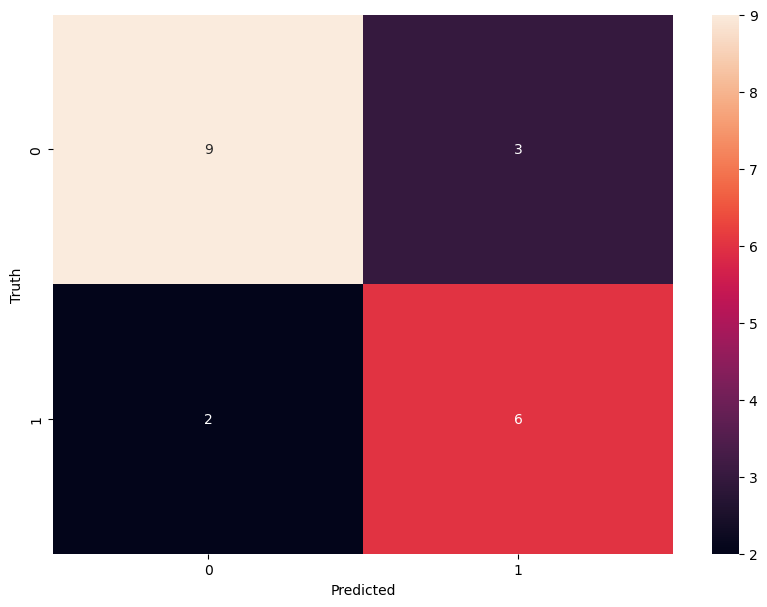

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# 使用 seaborn 来可视化混淆矩阵
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


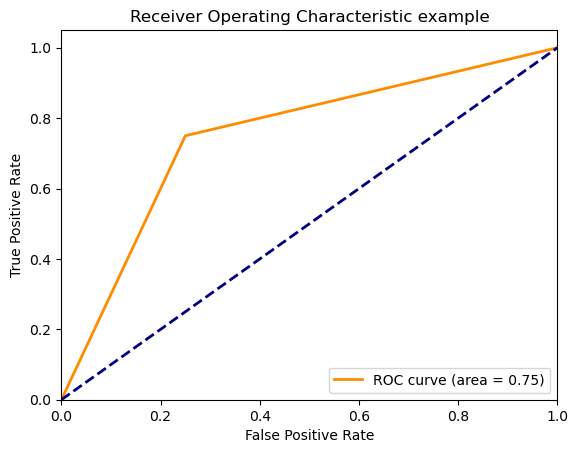

In [13]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic example')
plt.legend(loc="lower right")
plt.show()


In [24]:
# random forest k fold for old data and then test data


from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

kf = KFold(n_splits=10, random_state=7, shuffle=True)

five_models = []

X1 = df_data.iloc[:100]
y = df_label_num

X = np.array(X1)
y = np.array(y)

feature_importance = np.zeros(100)

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = RandomForestClassifier(n_estimators=200, random_state=7)
    clf.fit(X_train, y_train)
    five_models.append(clf)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    
    if accuracy >= 0.8:
        importances = clf.feature_importances_
        print('add')

        for feature, importance in zip(X1.columns, importances):
            feature_importance[feature] += importance
    
    


print(feature_importance)
    
    

1.0
add
0.8
add
0.7
0.7
0.3
0.8
add
0.5
0.7
0.8
add
0.7
[0.05688121 0.02657088 0.03525045 0.04815639 0.03809424 0.10884227
 0.06382976 0.09641118 0.0266744  0.04260461 0.03956987 0.03971948
 0.03197299 0.02561077 0.04670447 0.04043129 0.13032456 0.023889
 0.01813104 0.03213855 0.02382678 0.02475307 0.02979417 0.02473384
 0.04999513 0.02578629 0.03441655 0.0338641  0.03232879 0.10219393
 0.02387158 0.02182839 0.02122167 0.01669561 0.02807035 0.02605977
 0.0260487  0.03483262 0.06776884 0.03045754 0.03988953 0.03849033
 0.0293939  0.0217382  0.16187813 0.0793619  0.03568757 0.06666654
 0.03810308 0.04189524 0.02509867 0.0340544  0.0153371  0.02480109
 0.01798028 0.03178607 0.02591298 0.02827601 0.04014951 0.08622667
 0.02329845 0.01482206 0.1094092  0.05275366 0.02901778 0.03494675
 0.03410839 0.03460868 0.02548393 0.02985319 0.03857427 0.05870847
 0.04612715 0.02844098 0.02316165 0.04094199 0.01486697 0.042117
 0.02870034 0.04915974 0.06420541 0.02045    0.03311848 0.11423582
 0.0267609

In [34]:
# random forest k fold for old data and then test data


from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
group_models = []
group_num = 0
feature_importance = np.zeros(100)
for i in range(100):
    kf = KFold(n_splits=5, random_state=i, shuffle=True)

    X = df_data.iloc[:100]
    y = df_label_num

    X = np.array(X)
    y = np.array(y)

    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf = RandomForestClassifier(n_estimators=200, random_state=i)
        clf.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy >= 0.8:
            group_models.append(clf)
            group_num += 1
            
            importances = clf.feature_importances_
            for feature, importance in zip(X1.columns, importances):
                feature_importance[feature] += importance
    
    print(i)
    
print(group_num)
print(feature_importance)

    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
115
[1.72730275 1.19763044 0.94891892 1.59905316 0.96982262 2.74056208
 1.66657391 2.06194011 0.7587141  0.95160083 1.11992161 0.88669839
 0.91347007 0.73136995 1.06105853 1.14713352 2.59660628 0.67812314
 0.49131292 1.29539137 0.72605558 0.66400731 0.93701033 0.82101792
 1.33669044 0.8666871  0.67308966 0.99132408 1.1429257  2.67542535
 0.6652103  0.55172475 0.66363732 0.63048578 0.83718836 0.75855265
 0.84820269 1.12126279 2.19552812 1.00589485 1.10522106 1.18652079
 0.75536549 0.73922843 4.75165564 2.25059454 1.055582   1.59148096
 0.97306207 1.24015528 0.9759065  0.79544128 0.73815081 0.68612609
 0.78102873 1.05077109 0.79989272 0.8473241  0.98289803 2.85256544
 0.57314783 0.70655201 3.01401653 1.

In [35]:
# get test result through test data

import numpy as np
from scipy import stats

X_task = df_data.iloc[-29:]
result_list = []

for model in group_models:
    result = model.predict(X_task)
    result_list.append(result)
    print(result)

vote_result = stats.mode(result_list, axis=0).mode.flatten()

print(f'final result is : \n {vote_result}')


[1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1]
[1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1]
[1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1]
[1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1]
[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
[1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0]
[1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1]
[1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1]
[1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1]
[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1]
[1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1]
[1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1]
[1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1]
[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1]
[1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1]
[1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0

/tmp/ipykernel_6279/3728725041.py:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  vote_result = stats.mode(result_list, axis=0).mode.flatten()


In [33]:
import pandas as pd

result_list_df = pd.DataFrame(result_list)

counts = result_list_df.apply(lambda x: pd.Series([x.value_counts().get(0, 0), x.value_counts().get(1, 0)]))

counts = counts.transpose()

counts.columns = ['0', '1']

print(counts)



     0   1
0    1  55
1   18  38
2   25  31
3    0  56
4    0  56
5   23  33
6    0  56
7    5  51
8    1  55
9   33  23
10   3  53
11   0  56
12  16  40
13   0  56
14  14  42
15  14  42
16  18  38
17  32  24
18  16  40
19  24  32
20  16  40
21  44  12
22  15  41
23  31  25
24   0  56
25  29  27
26   3  53
27   0  56
28  13  43


In [20]:
# using old data through lightbgm model


import lightgbm as lgb

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print(X_train.dtypes)

# 创建一个列的列表
cols = [4, 5, 6, 7, 8, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

# 使用astype函数将所有需要的列转换为float类型
X_train[cols] = X_train[cols].astype(float)
X_test[cols] = X_test[cols].astype(float)

print(X_train.dtypes)




0     float64
1     float64
2     float64
3     float64
4      object
       ...   
95     object
96     object
97     object
98     object
99     object
Length: 100, dtype: object
0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
95    float64
96    float64
97    float64
98    float64
99    float64
Length: 100, dtype: object


/tmp/ipykernel_5306/1540832731.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols] = X_train[cols].astype(float)
/tmp/ipykernel_5306/1540832731.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cols] = X_test[cols].astype(float)


In [38]:
import lightgbm as lgb

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=5, random_state=40, shuffle=True)

five_models = []

X = df_data.iloc[:100]
y = df_label_num

X = np.array(X)
y = np.array(y)

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  
    'metric': 'binary_logloss',  
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
    
    gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20
                )
    
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

    y_pred = np.where(y_pred > 0.5, 1, 0)
    
    five_models.append(gbm)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(y_pred)
    print(accuracy)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [40]:
# get test result through test data

import numpy as np
from scipy import stats

X_task = df_data.iloc[-29:]
result_list = []

for model in five_models:
    
    result = model.predict(X_task)
    result = np.where(result > 0.5, 1, 0)
    result_list.append(result)
    print(result)

vote_result = stats.mode(result_list, axis=0).mode.flatten()

print(f'final result is : \n {vote_result}')

[0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1]
[0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1]
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0]
final result is : 
 [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1]


/tmp/ipykernel_6677/2790661949.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  vote_result = stats.mode(result_list, axis=0).mode.flatten()


In [66]:
from catboost import CatBoostClassifier


X = df_data.iloc[0:100]
y = df_label_num
list_model = []
list_num = 0
X = np.array(X)
y = np.array(y)

for i in range(100):
    
    kf = KFold(n_splits=5, random_state=i, shuffle=True)
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = CatBoostClassifier(iterations=10,
                               learning_rate=0.01,
                               depth=10,
                               loss_function='Logloss')
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy >= 0.8:
            list_model.append(model)
            list_num += 1
    
print(list_num)

0:	learn: 0.6873652	total: 19.7ms	remaining: 178ms
1:	learn: 0.6807540	total: 33.4ms	remaining: 133ms
2:	learn: 0.6749003	total: 47.2ms	remaining: 110ms
3:	learn: 0.6689657	total: 59.4ms	remaining: 89ms
4:	learn: 0.6637474	total: 71.7ms	remaining: 71.7ms
5:	learn: 0.6585455	total: 84.5ms	remaining: 56.3ms
6:	learn: 0.6534843	total: 96.5ms	remaining: 41.3ms
7:	learn: 0.6476209	total: 109ms	remaining: 27.2ms
8:	learn: 0.6417526	total: 122ms	remaining: 13.5ms
9:	learn: 0.6352264	total: 134ms	remaining: 0us
0:	learn: 0.6873151	total: 12ms	remaining: 108ms
1:	learn: 0.6816388	total: 24.7ms	remaining: 99ms
2:	learn: 0.6758499	total: 36.3ms	remaining: 84.8ms
3:	learn: 0.6698175	total: 49.4ms	remaining: 74ms
4:	learn: 0.6645525	total: 61.5ms	remaining: 61.5ms
5:	learn: 0.6587706	total: 74.5ms	remaining: 49.7ms
6:	learn: 0.6523704	total: 87.2ms	remaining: 37.4ms
7:	learn: 0.6463850	total: 100ms	remaining: 25ms
8:	learn: 0.6395646	total: 113ms	remaining: 12.6ms
9:	learn: 0.6333450	total: 127ms	r

0:	learn: 0.6857882	total: 13.5ms	remaining: 121ms
1:	learn: 0.6795209	total: 26.3ms	remaining: 105ms
2:	learn: 0.6726312	total: 39.6ms	remaining: 92.5ms
3:	learn: 0.6658628	total: 53ms	remaining: 79.5ms
4:	learn: 0.6602181	total: 65.7ms	remaining: 65.7ms
5:	learn: 0.6549370	total: 79.7ms	remaining: 53.1ms
6:	learn: 0.6484645	total: 93.1ms	remaining: 39.9ms
7:	learn: 0.6437390	total: 106ms	remaining: 26.5ms
8:	learn: 0.6362648	total: 118ms	remaining: 13.2ms
9:	learn: 0.6309864	total: 131ms	remaining: 0us
0:	learn: 0.6871096	total: 12.1ms	remaining: 109ms
1:	learn: 0.6816703	total: 25ms	remaining: 100ms
2:	learn: 0.6753084	total: 37.5ms	remaining: 87.6ms
3:	learn: 0.6679791	total: 49.4ms	remaining: 74.1ms
4:	learn: 0.6628013	total: 61.4ms	remaining: 61.4ms
5:	learn: 0.6575372	total: 73.9ms	remaining: 49.2ms
6:	learn: 0.6515945	total: 85.7ms	remaining: 36.7ms
7:	learn: 0.6458310	total: 98.6ms	remaining: 24.6ms
8:	learn: 0.6386873	total: 111ms	remaining: 12.3ms
9:	learn: 0.6326663	total: 

2:	learn: 0.6765803	total: 36.5ms	remaining: 85.2ms
3:	learn: 0.6701702	total: 49ms	remaining: 73.5ms
4:	learn: 0.6646161	total: 61.6ms	remaining: 61.6ms
5:	learn: 0.6590487	total: 74.1ms	remaining: 49.4ms
6:	learn: 0.6523646	total: 86.7ms	remaining: 37.2ms
7:	learn: 0.6459553	total: 99.9ms	remaining: 25ms
8:	learn: 0.6389317	total: 112ms	remaining: 12.5ms
9:	learn: 0.6329239	total: 124ms	remaining: 0us
0:	learn: 0.6881224	total: 12ms	remaining: 108ms
1:	learn: 0.6826515	total: 24.2ms	remaining: 96.7ms
2:	learn: 0.6767698	total: 36ms	remaining: 84ms
3:	learn: 0.6713404	total: 48.6ms	remaining: 72.9ms
4:	learn: 0.6658267	total: 61.3ms	remaining: 61.3ms
5:	learn: 0.6603817	total: 73.1ms	remaining: 48.7ms
6:	learn: 0.6551766	total: 85.8ms	remaining: 36.8ms
7:	learn: 0.6490264	total: 98.2ms	remaining: 24.6ms
8:	learn: 0.6423030	total: 110ms	remaining: 12.2ms
9:	learn: 0.6365024	total: 123ms	remaining: 0us
0:	learn: 0.6874339	total: 12.6ms	remaining: 113ms
1:	learn: 0.6807609	total: 25ms	re

0:	learn: 0.6871790	total: 11.9ms	remaining: 107ms
1:	learn: 0.6822764	total: 24.7ms	remaining: 98.8ms
2:	learn: 0.6754643	total: 37.4ms	remaining: 87.3ms
3:	learn: 0.6692217	total: 49.7ms	remaining: 74.6ms
4:	learn: 0.6632227	total: 62.1ms	remaining: 62.1ms
5:	learn: 0.6572482	total: 74.5ms	remaining: 49.6ms
6:	learn: 0.6519222	total: 86.5ms	remaining: 37.1ms
7:	learn: 0.6464035	total: 98.6ms	remaining: 24.7ms
8:	learn: 0.6407667	total: 111ms	remaining: 12.3ms
9:	learn: 0.6343513	total: 123ms	remaining: 0us
0:	learn: 0.6866810	total: 12.5ms	remaining: 113ms
1:	learn: 0.6798782	total: 24.7ms	remaining: 98.9ms
2:	learn: 0.6748711	total: 37.7ms	remaining: 88ms
3:	learn: 0.6683083	total: 49.5ms	remaining: 74.3ms
4:	learn: 0.6623178	total: 61.6ms	remaining: 61.6ms
5:	learn: 0.6556443	total: 73.4ms	remaining: 48.9ms
6:	learn: 0.6497770	total: 85.5ms	remaining: 36.7ms
7:	learn: 0.6433385	total: 97.5ms	remaining: 24.4ms
8:	learn: 0.6372513	total: 111ms	remaining: 12.3ms
9:	learn: 0.6312847	to

4:	learn: 0.6626602	total: 62.2ms	remaining: 62.2ms
5:	learn: 0.6579246	total: 74.2ms	remaining: 49.5ms
6:	learn: 0.6518475	total: 86.1ms	remaining: 36.9ms
7:	learn: 0.6456002	total: 98.3ms	remaining: 24.6ms
8:	learn: 0.6400258	total: 111ms	remaining: 12.3ms
9:	learn: 0.6339199	total: 124ms	remaining: 0us
0:	learn: 0.6865146	total: 4.7ms	remaining: 42.3ms
1:	learn: 0.6803092	total: 16ms	remaining: 63.8ms
2:	learn: 0.6743606	total: 28.8ms	remaining: 67.3ms
3:	learn: 0.6682806	total: 41ms	remaining: 61.5ms
4:	learn: 0.6621934	total: 53.4ms	remaining: 53.4ms
5:	learn: 0.6549090	total: 55.8ms	remaining: 37.2ms
6:	learn: 0.6498806	total: 67.6ms	remaining: 29ms
7:	learn: 0.6448017	total: 80.1ms	remaining: 20ms
8:	learn: 0.6384520	total: 92.7ms	remaining: 10.3ms
9:	learn: 0.6324780	total: 106ms	remaining: 0us
0:	learn: 0.6868677	total: 11ms	remaining: 98.9ms
1:	learn: 0.6811671	total: 23.1ms	remaining: 92.3ms
2:	learn: 0.6758786	total: 35.9ms	remaining: 83.7ms
3:	learn: 0.6686275	total: 48.2m

0:	learn: 0.6865172	total: 11.8ms	remaining: 107ms
1:	learn: 0.6806958	total: 24.7ms	remaining: 98.9ms
2:	learn: 0.6748300	total: 37.2ms	remaining: 86.9ms
3:	learn: 0.6679126	total: 49.9ms	remaining: 74.8ms
4:	learn: 0.6615473	total: 63.4ms	remaining: 63.4ms
5:	learn: 0.6550208	total: 76.2ms	remaining: 50.8ms
6:	learn: 0.6483724	total: 88.2ms	remaining: 37.8ms
7:	learn: 0.6425638	total: 100ms	remaining: 25ms
8:	learn: 0.6353691	total: 111ms	remaining: 12.4ms
9:	learn: 0.6282550	total: 124ms	remaining: 0us
0:	learn: 0.6871888	total: 11.6ms	remaining: 105ms
1:	learn: 0.6800695	total: 23.5ms	remaining: 94ms
2:	learn: 0.6748920	total: 35.3ms	remaining: 82.5ms
3:	learn: 0.6693733	total: 47.9ms	remaining: 71.9ms
4:	learn: 0.6644747	total: 59.5ms	remaining: 59.5ms
5:	learn: 0.6580103	total: 71.4ms	remaining: 47.6ms
6:	learn: 0.6522564	total: 83.8ms	remaining: 35.9ms
7:	learn: 0.6456561	total: 95.8ms	remaining: 23.9ms
8:	learn: 0.6387454	total: 109ms	remaining: 12.1ms
9:	learn: 0.6330935	total

2:	learn: 0.6737975	total: 37.4ms	remaining: 87.2ms
3:	learn: 0.6679899	total: 48.8ms	remaining: 73.2ms
4:	learn: 0.6625096	total: 60.5ms	remaining: 60.5ms
5:	learn: 0.6563014	total: 74.2ms	remaining: 49.5ms
6:	learn: 0.6516334	total: 86.9ms	remaining: 37.3ms
7:	learn: 0.6467283	total: 99.4ms	remaining: 24.9ms
8:	learn: 0.6402088	total: 112ms	remaining: 12.4ms
9:	learn: 0.6339331	total: 125ms	remaining: 0us
0:	learn: 0.6864956	total: 4.04ms	remaining: 36.3ms
1:	learn: 0.6804699	total: 14.4ms	remaining: 57.6ms
2:	learn: 0.6741207	total: 25.6ms	remaining: 59.7ms
3:	learn: 0.6677230	total: 37.9ms	remaining: 56.9ms
4:	learn: 0.6619959	total: 50.8ms	remaining: 50.8ms
5:	learn: 0.6558457	total: 62.4ms	remaining: 41.6ms
6:	learn: 0.6497102	total: 74.7ms	remaining: 32ms
7:	learn: 0.6432389	total: 86.9ms	remaining: 21.7ms
8:	learn: 0.6365090	total: 99.2ms	remaining: 11ms
9:	learn: 0.6305792	total: 111ms	remaining: 0us
0:	learn: 0.6883419	total: 12.6ms	remaining: 114ms
1:	learn: 0.6816814	total:

6:	learn: 0.6528044	total: 85.6ms	remaining: 36.7ms
7:	learn: 0.6463835	total: 98.1ms	remaining: 24.5ms
8:	learn: 0.6403677	total: 111ms	remaining: 12.3ms
9:	learn: 0.6345355	total: 124ms	remaining: 0us
0:	learn: 0.6867219	total: 12.5ms	remaining: 113ms
1:	learn: 0.6795462	total: 23.9ms	remaining: 95.7ms
2:	learn: 0.6743021	total: 35.8ms	remaining: 83.5ms
3:	learn: 0.6684435	total: 48ms	remaining: 72ms
4:	learn: 0.6635625	total: 60.6ms	remaining: 60.6ms
5:	learn: 0.6572429	total: 72.7ms	remaining: 48.4ms
6:	learn: 0.6520109	total: 85.4ms	remaining: 36.6ms
7:	learn: 0.6464941	total: 97.7ms	remaining: 24.4ms
8:	learn: 0.6407453	total: 110ms	remaining: 12.3ms
9:	learn: 0.6352592	total: 122ms	remaining: 0us
0:	learn: 0.6876218	total: 11.5ms	remaining: 103ms
1:	learn: 0.6812779	total: 23.8ms	remaining: 95.3ms
2:	learn: 0.6747226	total: 35.6ms	remaining: 83.1ms
3:	learn: 0.6686588	total: 49ms	remaining: 73.4ms
4:	learn: 0.6631071	total: 59.7ms	remaining: 59.7ms
5:	learn: 0.6564156	total: 71.

8:	learn: 0.6408390	total: 110ms	remaining: 12.2ms
9:	learn: 0.6346065	total: 122ms	remaining: 0us
0:	learn: 0.6874240	total: 10.8ms	remaining: 97.6ms
1:	learn: 0.6809469	total: 22.9ms	remaining: 91.6ms
2:	learn: 0.6758526	total: 35ms	remaining: 81.7ms
3:	learn: 0.6701114	total: 47ms	remaining: 70.5ms
4:	learn: 0.6634042	total: 59.8ms	remaining: 59.8ms
5:	learn: 0.6572509	total: 71.3ms	remaining: 47.5ms
6:	learn: 0.6517379	total: 83.2ms	remaining: 35.7ms
7:	learn: 0.6468471	total: 95.8ms	remaining: 23.9ms
8:	learn: 0.6404862	total: 108ms	remaining: 12ms
9:	learn: 0.6337754	total: 120ms	remaining: 0us
0:	learn: 0.6877370	total: 12.3ms	remaining: 111ms
1:	learn: 0.6812873	total: 24.8ms	remaining: 99ms
2:	learn: 0.6754595	total: 36.7ms	remaining: 85.6ms
3:	learn: 0.6688252	total: 48.5ms	remaining: 72.7ms
4:	learn: 0.6639396	total: 60.9ms	remaining: 60.9ms
5:	learn: 0.6583984	total: 73.8ms	remaining: 49.2ms
6:	learn: 0.6532491	total: 86.6ms	remaining: 37.1ms
7:	learn: 0.6473053	total: 100m

0:	learn: 0.6877061	total: 11.9ms	remaining: 108ms
1:	learn: 0.6807613	total: 25ms	remaining: 100ms
2:	learn: 0.6753797	total: 38.2ms	remaining: 89.1ms
3:	learn: 0.6696393	total: 50.7ms	remaining: 76ms
4:	learn: 0.6641730	total: 63.3ms	remaining: 63.3ms
5:	learn: 0.6587832	total: 76.2ms	remaining: 50.8ms
6:	learn: 0.6536424	total: 88.8ms	remaining: 38ms
7:	learn: 0.6477932	total: 101ms	remaining: 25.3ms
8:	learn: 0.6410913	total: 113ms	remaining: 12.6ms
9:	learn: 0.6347205	total: 125ms	remaining: 0us
0:	learn: 0.6873911	total: 11.3ms	remaining: 101ms
1:	learn: 0.6808920	total: 23ms	remaining: 91.9ms
2:	learn: 0.6757946	total: 35.4ms	remaining: 82.6ms
3:	learn: 0.6697220	total: 47.5ms	remaining: 71.3ms
4:	learn: 0.6640167	total: 59.3ms	remaining: 59.3ms
5:	learn: 0.6567507	total: 71.2ms	remaining: 47.5ms
6:	learn: 0.6510540	total: 83.4ms	remaining: 35.7ms
7:	learn: 0.6449263	total: 96.3ms	remaining: 24.1ms
8:	learn: 0.6378932	total: 110ms	remaining: 12.2ms
9:	learn: 0.6319802	total: 122

3:	learn: 0.6699495	total: 49.7ms	remaining: 74.5ms
4:	learn: 0.6643140	total: 62ms	remaining: 62ms
5:	learn: 0.6587703	total: 75.2ms	remaining: 50.1ms
6:	learn: 0.6527379	total: 88.1ms	remaining: 37.8ms
7:	learn: 0.6464867	total: 101ms	remaining: 25.2ms
8:	learn: 0.6395854	total: 114ms	remaining: 12.6ms
9:	learn: 0.6329008	total: 126ms	remaining: 0us
0:	learn: 0.6887441	total: 12.3ms	remaining: 111ms
1:	learn: 0.6819714	total: 24.6ms	remaining: 98.6ms
2:	learn: 0.6761251	total: 37.1ms	remaining: 86.6ms
3:	learn: 0.6711329	total: 49.5ms	remaining: 74.3ms
4:	learn: 0.6654881	total: 61.9ms	remaining: 61.9ms
5:	learn: 0.6598249	total: 74.8ms	remaining: 49.9ms
6:	learn: 0.6546336	total: 87.1ms	remaining: 37.3ms
7:	learn: 0.6489293	total: 99.3ms	remaining: 24.8ms
8:	learn: 0.6421751	total: 111ms	remaining: 12.4ms
9:	learn: 0.6370094	total: 123ms	remaining: 0us
0:	learn: 0.6867844	total: 4.4ms	remaining: 39.6ms
1:	learn: 0.6812591	total: 16.4ms	remaining: 65.6ms
2:	learn: 0.6761720	total: 28

8:	learn: 0.6378514	total: 102ms	remaining: 11.3ms
9:	learn: 0.6323048	total: 115ms	remaining: 0us
0:	learn: 0.6876248	total: 4.2ms	remaining: 37.8ms
1:	learn: 0.6818839	total: 16.4ms	remaining: 65.5ms
2:	learn: 0.6766154	total: 29.4ms	remaining: 68.5ms
3:	learn: 0.6722646	total: 42.5ms	remaining: 63.7ms
4:	learn: 0.6666330	total: 55.8ms	remaining: 55.8ms
5:	learn: 0.6613366	total: 67.8ms	remaining: 45.2ms
6:	learn: 0.6548198	total: 80.7ms	remaining: 34.6ms
7:	learn: 0.6499459	total: 93.3ms	remaining: 23.3ms
8:	learn: 0.6433773	total: 106ms	remaining: 11.8ms
9:	learn: 0.6380146	total: 119ms	remaining: 0us
0:	learn: 0.6880416	total: 11.8ms	remaining: 107ms
1:	learn: 0.6816977	total: 23.7ms	remaining: 94.7ms
2:	learn: 0.6760333	total: 35.7ms	remaining: 83.3ms
3:	learn: 0.6702739	total: 48.7ms	remaining: 73ms
4:	learn: 0.6630789	total: 61.5ms	remaining: 61.5ms
5:	learn: 0.6569132	total: 73.9ms	remaining: 49.3ms
6:	learn: 0.6521646	total: 87.3ms	remaining: 37.4ms
7:	learn: 0.6469318	total:

2:	learn: 0.6757967	total: 36.8ms	remaining: 85.8ms
3:	learn: 0.6703239	total: 49.3ms	remaining: 74ms
4:	learn: 0.6643064	total: 61.3ms	remaining: 61.3ms
5:	learn: 0.6580066	total: 74ms	remaining: 49.3ms
6:	learn: 0.6533089	total: 86.9ms	remaining: 37.2ms
7:	learn: 0.6484062	total: 98.7ms	remaining: 24.7ms
8:	learn: 0.6439069	total: 111ms	remaining: 12.3ms
9:	learn: 0.6386888	total: 123ms	remaining: 0us
0:	learn: 0.6870376	total: 12.1ms	remaining: 109ms
1:	learn: 0.6803166	total: 24ms	remaining: 95.9ms
2:	learn: 0.6731751	total: 36.5ms	remaining: 85.1ms
3:	learn: 0.6664671	total: 48.8ms	remaining: 73.1ms
4:	learn: 0.6606929	total: 61.1ms	remaining: 61.1ms
5:	learn: 0.6537882	total: 73.4ms	remaining: 48.9ms
6:	learn: 0.6472104	total: 84.7ms	remaining: 36.3ms
7:	learn: 0.6411500	total: 96.7ms	remaining: 24.2ms
8:	learn: 0.6338448	total: 109ms	remaining: 12.1ms
9:	learn: 0.6280223	total: 122ms	remaining: 0us
0:	learn: 0.6879461	total: 12ms	remaining: 108ms
1:	learn: 0.6813330	total: 23.9m

8:	learn: 0.6396704	total: 110ms	remaining: 12.2ms
9:	learn: 0.6337144	total: 122ms	remaining: 0us
0:	learn: 0.6872719	total: 12.8ms	remaining: 115ms
1:	learn: 0.6802317	total: 25.5ms	remaining: 102ms
2:	learn: 0.6743217	total: 37.2ms	remaining: 86.7ms
3:	learn: 0.6679787	total: 49.7ms	remaining: 74.5ms
4:	learn: 0.6626188	total: 61.6ms	remaining: 61.6ms
5:	learn: 0.6570821	total: 74.3ms	remaining: 49.5ms
6:	learn: 0.6520058	total: 86.3ms	remaining: 37ms
7:	learn: 0.6462559	total: 98.9ms	remaining: 24.7ms
8:	learn: 0.6405855	total: 111ms	remaining: 12.3ms
9:	learn: 0.6345164	total: 123ms	remaining: 0us
0:	learn: 0.6883580	total: 10.9ms	remaining: 98.1ms
1:	learn: 0.6814788	total: 23ms	remaining: 92ms
2:	learn: 0.6751758	total: 34.9ms	remaining: 81.5ms
3:	learn: 0.6703072	total: 47.7ms	remaining: 71.5ms
4:	learn: 0.6645856	total: 58.6ms	remaining: 58.6ms
5:	learn: 0.6587288	total: 71.8ms	remaining: 47.8ms
6:	learn: 0.6533168	total: 84.6ms	remaining: 36.2ms
7:	learn: 0.6471303	total: 96.

2:	learn: 0.6726126	total: 35.9ms	remaining: 83.7ms
3:	learn: 0.6670299	total: 48ms	remaining: 72ms
4:	learn: 0.6618106	total: 60.5ms	remaining: 60.5ms
5:	learn: 0.6549965	total: 74.2ms	remaining: 49.4ms
6:	learn: 0.6490634	total: 86.7ms	remaining: 37.1ms
7:	learn: 0.6438506	total: 98.7ms	remaining: 24.7ms
8:	learn: 0.6364823	total: 111ms	remaining: 12.4ms
9:	learn: 0.6304871	total: 123ms	remaining: 0us
0:	learn: 0.6866790	total: 11.5ms	remaining: 104ms
1:	learn: 0.6805904	total: 23.9ms	remaining: 95.5ms
2:	learn: 0.6745638	total: 36.4ms	remaining: 84.8ms
3:	learn: 0.6685380	total: 48.2ms	remaining: 72.3ms
4:	learn: 0.6616738	total: 60.2ms	remaining: 60.2ms
5:	learn: 0.6558630	total: 72.4ms	remaining: 48.2ms
6:	learn: 0.6491899	total: 84.6ms	remaining: 36.3ms
7:	learn: 0.6440825	total: 96.6ms	remaining: 24.1ms
8:	learn: 0.6378684	total: 109ms	remaining: 12.1ms
9:	learn: 0.6317372	total: 120ms	remaining: 0us
0:	learn: 0.6857070	total: 4.23ms	remaining: 38.1ms
1:	learn: 0.6787662	total: 

5:	learn: 0.6552311	total: 62.5ms	remaining: 41.7ms
6:	learn: 0.6495035	total: 74.5ms	remaining: 31.9ms
7:	learn: 0.6432888	total: 87ms	remaining: 21.8ms
8:	learn: 0.6368904	total: 100ms	remaining: 11.1ms
9:	learn: 0.6317931	total: 112ms	remaining: 0us
0:	learn: 0.6873835	total: 10.8ms	remaining: 97.3ms
1:	learn: 0.6814767	total: 22.8ms	remaining: 91.1ms
2:	learn: 0.6766242	total: 34.5ms	remaining: 80.4ms
3:	learn: 0.6700695	total: 45.7ms	remaining: 68.5ms
4:	learn: 0.6622723	total: 57.8ms	remaining: 57.8ms
5:	learn: 0.6565001	total: 69.9ms	remaining: 46.6ms
6:	learn: 0.6513814	total: 81.1ms	remaining: 34.8ms
7:	learn: 0.6451521	total: 93.2ms	remaining: 23.3ms
8:	learn: 0.6395520	total: 105ms	remaining: 11.6ms
9:	learn: 0.6333310	total: 117ms	remaining: 0us
0:	learn: 0.6876690	total: 10.9ms	remaining: 98.4ms
1:	learn: 0.6808817	total: 22.7ms	remaining: 90.9ms
2:	learn: 0.6750295	total: 35.2ms	remaining: 82.1ms
3:	learn: 0.6685975	total: 47.7ms	remaining: 71.6ms
4:	learn: 0.6629734	tota

9:	learn: 0.6334074	total: 125ms	remaining: 0us
0:	learn: 0.6878967	total: 11.6ms	remaining: 104ms
1:	learn: 0.6814515	total: 23.8ms	remaining: 95.1ms
2:	learn: 0.6754051	total: 36.9ms	remaining: 86.2ms
3:	learn: 0.6685175	total: 49.2ms	remaining: 73.8ms
4:	learn: 0.6633748	total: 61.5ms	remaining: 61.5ms
5:	learn: 0.6579478	total: 73.5ms	remaining: 49ms
6:	learn: 0.6520055	total: 85.9ms	remaining: 36.8ms
7:	learn: 0.6450871	total: 98.3ms	remaining: 24.6ms
8:	learn: 0.6394742	total: 110ms	remaining: 12.3ms
9:	learn: 0.6336051	total: 123ms	remaining: 0us
0:	learn: 0.6875726	total: 11.7ms	remaining: 105ms
1:	learn: 0.6819826	total: 23.6ms	remaining: 94.4ms
2:	learn: 0.6762340	total: 35.8ms	remaining: 83.6ms
3:	learn: 0.6704306	total: 47.9ms	remaining: 71.9ms
4:	learn: 0.6657890	total: 60.2ms	remaining: 60.2ms
5:	learn: 0.6596984	total: 72.7ms	remaining: 48.5ms
6:	learn: 0.6538969	total: 84.9ms	remaining: 36.4ms
7:	learn: 0.6488568	total: 98.1ms	remaining: 24.5ms
8:	learn: 0.6426986	total

6:	learn: 0.6506628	total: 77.3ms	remaining: 33.1ms
7:	learn: 0.6446792	total: 89.6ms	remaining: 22.4ms
8:	learn: 0.6379926	total: 103ms	remaining: 11.4ms
9:	learn: 0.6315954	total: 116ms	remaining: 0us
0:	learn: 0.6873668	total: 11.7ms	remaining: 105ms
1:	learn: 0.6806067	total: 23.6ms	remaining: 94.6ms
2:	learn: 0.6750949	total: 35.6ms	remaining: 83.2ms
3:	learn: 0.6680032	total: 48.2ms	remaining: 72.3ms
4:	learn: 0.6622854	total: 60.3ms	remaining: 60.3ms
5:	learn: 0.6561924	total: 72.2ms	remaining: 48.1ms
6:	learn: 0.6504366	total: 84.8ms	remaining: 36.4ms
7:	learn: 0.6445973	total: 97.3ms	remaining: 24.3ms
8:	learn: 0.6375290	total: 110ms	remaining: 12.2ms
9:	learn: 0.6323962	total: 121ms	remaining: 0us
0:	learn: 0.6867423	total: 12.7ms	remaining: 114ms
1:	learn: 0.6808055	total: 25.3ms	remaining: 101ms
2:	learn: 0.6748943	total: 37.7ms	remaining: 87.9ms
3:	learn: 0.6671013	total: 51.2ms	remaining: 76.7ms
4:	learn: 0.6616013	total: 63.8ms	remaining: 63.8ms
5:	learn: 0.6561122	total

0:	learn: 0.6879935	total: 10.1ms	remaining: 90.9ms
1:	learn: 0.6823066	total: 22.4ms	remaining: 89.5ms
2:	learn: 0.6770387	total: 34.8ms	remaining: 81.3ms
3:	learn: 0.6704717	total: 47.5ms	remaining: 71.3ms
4:	learn: 0.6652411	total: 60.1ms	remaining: 60.1ms
5:	learn: 0.6583209	total: 72.1ms	remaining: 48.1ms
6:	learn: 0.6536313	total: 84.9ms	remaining: 36.4ms
7:	learn: 0.6478949	total: 97.1ms	remaining: 24.3ms
8:	learn: 0.6422848	total: 109ms	remaining: 12.1ms
9:	learn: 0.6366126	total: 121ms	remaining: 0us
0:	learn: 0.6880310	total: 10.9ms	remaining: 98.1ms
1:	learn: 0.6816502	total: 23.5ms	remaining: 94ms
2:	learn: 0.6759883	total: 35.5ms	remaining: 82.7ms
3:	learn: 0.6696033	total: 47.5ms	remaining: 71.3ms
4:	learn: 0.6645496	total: 59.3ms	remaining: 59.3ms
5:	learn: 0.6585340	total: 71.5ms	remaining: 47.7ms
6:	learn: 0.6526976	total: 84.1ms	remaining: 36.1ms
7:	learn: 0.6471062	total: 96.8ms	remaining: 24.2ms
8:	learn: 0.6414778	total: 109ms	remaining: 12.2ms
9:	learn: 0.6355731	

4:	learn: 0.6645410	total: 59.7ms	remaining: 59.7ms
5:	learn: 0.6582662	total: 72.6ms	remaining: 48.4ms
6:	learn: 0.6523965	total: 85.8ms	remaining: 36.8ms
7:	learn: 0.6464835	total: 98.1ms	remaining: 24.5ms
8:	learn: 0.6397732	total: 109ms	remaining: 12.1ms
9:	learn: 0.6341599	total: 121ms	remaining: 0us
0:	learn: 0.6883038	total: 12ms	remaining: 108ms
1:	learn: 0.6825321	total: 24.7ms	remaining: 98.9ms
2:	learn: 0.6766693	total: 37.1ms	remaining: 86.7ms
3:	learn: 0.6697413	total: 49.6ms	remaining: 74.4ms
4:	learn: 0.6637383	total: 62.2ms	remaining: 62.2ms
5:	learn: 0.6585898	total: 74.9ms	remaining: 49.9ms
6:	learn: 0.6524736	total: 87ms	remaining: 37.3ms
7:	learn: 0.6457906	total: 99.6ms	remaining: 24.9ms
8:	learn: 0.6394989	total: 112ms	remaining: 12.4ms
9:	learn: 0.6341050	total: 124ms	remaining: 0us
0:	learn: 0.6876480	total: 11.2ms	remaining: 101ms
1:	learn: 0.6816318	total: 24ms	remaining: 95.8ms
2:	learn: 0.6755857	total: 26.4ms	remaining: 61.6ms
3:	learn: 0.6683575	total: 39.

9:	learn: 0.6362870	total: 123ms	remaining: 0us
0:	learn: 0.6870787	total: 12.4ms	remaining: 112ms
1:	learn: 0.6803925	total: 17.2ms	remaining: 69ms
2:	learn: 0.6745129	total: 28.7ms	remaining: 66.9ms
3:	learn: 0.6693680	total: 42ms	remaining: 63.1ms
4:	learn: 0.6639654	total: 55.8ms	remaining: 55.8ms
5:	learn: 0.6581902	total: 69ms	remaining: 46ms
6:	learn: 0.6520373	total: 81.4ms	remaining: 34.9ms
7:	learn: 0.6455558	total: 92.7ms	remaining: 23.2ms
8:	learn: 0.6403202	total: 105ms	remaining: 11.7ms
9:	learn: 0.6351143	total: 117ms	remaining: 0us
0:	learn: 0.6863219	total: 12.3ms	remaining: 110ms
1:	learn: 0.6798225	total: 25.8ms	remaining: 103ms
2:	learn: 0.6738479	total: 37.9ms	remaining: 88.4ms
3:	learn: 0.6682064	total: 50.1ms	remaining: 75.1ms
4:	learn: 0.6631472	total: 62.1ms	remaining: 62.1ms
5:	learn: 0.6577025	total: 75ms	remaining: 50ms
6:	learn: 0.6528822	total: 88.4ms	remaining: 37.9ms
7:	learn: 0.6469682	total: 101ms	remaining: 25.2ms
8:	learn: 0.6409965	total: 113ms	rema

1:	learn: 0.6814979	total: 24.8ms	remaining: 99.2ms
2:	learn: 0.6755282	total: 37.3ms	remaining: 87ms
3:	learn: 0.6700109	total: 50.3ms	remaining: 75.5ms
4:	learn: 0.6646616	total: 62.8ms	remaining: 62.8ms
5:	learn: 0.6576392	total: 75.8ms	remaining: 50.6ms
6:	learn: 0.6512683	total: 87.6ms	remaining: 37.5ms
7:	learn: 0.6456424	total: 99.7ms	remaining: 24.9ms
8:	learn: 0.6396548	total: 112ms	remaining: 12.5ms
9:	learn: 0.6334729	total: 125ms	remaining: 0us
0:	learn: 0.6866975	total: 11.7ms	remaining: 105ms
1:	learn: 0.6806680	total: 24.1ms	remaining: 96.3ms
2:	learn: 0.6742545	total: 36.4ms	remaining: 85ms
3:	learn: 0.6685467	total: 48.6ms	remaining: 72.9ms
4:	learn: 0.6629203	total: 61.6ms	remaining: 61.6ms
5:	learn: 0.6577147	total: 73.1ms	remaining: 48.7ms
6:	learn: 0.6516322	total: 84.8ms	remaining: 36.3ms
7:	learn: 0.6462239	total: 97.5ms	remaining: 24.4ms
8:	learn: 0.6394287	total: 109ms	remaining: 12.1ms
9:	learn: 0.6338827	total: 123ms	remaining: 0us
0:	learn: 0.6883897	total: 

5:	learn: 0.6613847	total: 65.5ms	remaining: 43.7ms
6:	learn: 0.6561191	total: 78ms	remaining: 33.4ms
7:	learn: 0.6501737	total: 89.4ms	remaining: 22.3ms
8:	learn: 0.6451490	total: 103ms	remaining: 11.4ms
9:	learn: 0.6407132	total: 116ms	remaining: 0us
0:	learn: 0.6866461	total: 12.9ms	remaining: 116ms
1:	learn: 0.6807117	total: 25.2ms	remaining: 101ms
2:	learn: 0.6750036	total: 37.8ms	remaining: 88.3ms
3:	learn: 0.6693479	total: 50ms	remaining: 75ms
4:	learn: 0.6629352	total: 62.9ms	remaining: 62.9ms
5:	learn: 0.6569141	total: 74.9ms	remaining: 49.9ms
6:	learn: 0.6520604	total: 87.1ms	remaining: 37.3ms
7:	learn: 0.6460120	total: 99.1ms	remaining: 24.8ms
8:	learn: 0.6403241	total: 112ms	remaining: 12.4ms
9:	learn: 0.6347287	total: 124ms	remaining: 0us
0:	learn: 0.6876130	total: 11.6ms	remaining: 104ms
1:	learn: 0.6818578	total: 24.1ms	remaining: 96.6ms
2:	learn: 0.6759557	total: 36.4ms	remaining: 84.8ms
3:	learn: 0.6690574	total: 41.1ms	remaining: 61.6ms
4:	learn: 0.6640492	total: 54ms

6:	learn: 0.6488129	total: 87.3ms	remaining: 37.4ms
7:	learn: 0.6435634	total: 99.5ms	remaining: 24.9ms
8:	learn: 0.6367220	total: 111ms	remaining: 12.4ms
9:	learn: 0.6304924	total: 125ms	remaining: 0us
0:	learn: 0.6870686	total: 11.6ms	remaining: 105ms
1:	learn: 0.6810582	total: 24.1ms	remaining: 96.2ms
2:	learn: 0.6740044	total: 28.4ms	remaining: 66.2ms
3:	learn: 0.6673639	total: 39.7ms	remaining: 59.6ms
4:	learn: 0.6607086	total: 52.3ms	remaining: 52.3ms
5:	learn: 0.6543085	total: 65.2ms	remaining: 43.4ms
6:	learn: 0.6483588	total: 76.5ms	remaining: 32.8ms
7:	learn: 0.6423629	total: 89.3ms	remaining: 22.3ms
8:	learn: 0.6364170	total: 101ms	remaining: 11.3ms
9:	learn: 0.6298147	total: 114ms	remaining: 0us
0:	learn: 0.6867590	total: 11.8ms	remaining: 106ms
1:	learn: 0.6791787	total: 24ms	remaining: 96ms
2:	learn: 0.6733852	total: 36.1ms	remaining: 84.2ms
3:	learn: 0.6677906	total: 48.7ms	remaining: 73ms
4:	learn: 0.6615758	total: 61ms	remaining: 61ms
5:	learn: 0.6559422	total: 74.5ms	

0:	learn: 0.6864209	total: 11.4ms	remaining: 103ms
1:	learn: 0.6797678	total: 23.5ms	remaining: 93.8ms
2:	learn: 0.6733630	total: 35.5ms	remaining: 82.8ms
3:	learn: 0.6653859	total: 48.1ms	remaining: 72.1ms
4:	learn: 0.6600433	total: 61.3ms	remaining: 61.3ms
5:	learn: 0.6543499	total: 73.6ms	remaining: 49ms
6:	learn: 0.6489544	total: 85.2ms	remaining: 36.5ms
7:	learn: 0.6437932	total: 97.1ms	remaining: 24.3ms
8:	learn: 0.6380874	total: 109ms	remaining: 12.1ms
9:	learn: 0.6312191	total: 121ms	remaining: 0us
0:	learn: 0.6870225	total: 12.4ms	remaining: 112ms
1:	learn: 0.6803849	total: 24.8ms	remaining: 99.3ms
2:	learn: 0.6734382	total: 36.5ms	remaining: 85.2ms
3:	learn: 0.6678823	total: 48.6ms	remaining: 72.9ms
4:	learn: 0.6619703	total: 60.4ms	remaining: 60.4ms
5:	learn: 0.6552859	total: 72.7ms	remaining: 48.4ms
6:	learn: 0.6489056	total: 85.2ms	remaining: 36.5ms
7:	learn: 0.6420369	total: 98.3ms	remaining: 24.6ms
8:	learn: 0.6361327	total: 112ms	remaining: 12.4ms
9:	learn: 0.6308051	to

1:	learn: 0.6789261	total: 25.5ms	remaining: 102ms
2:	learn: 0.6733679	total: 37.1ms	remaining: 86.5ms
3:	learn: 0.6672688	total: 49.1ms	remaining: 73.6ms
4:	learn: 0.6614070	total: 61.5ms	remaining: 61.5ms
5:	learn: 0.6557302	total: 74.2ms	remaining: 49.4ms
6:	learn: 0.6504757	total: 85.8ms	remaining: 36.8ms
7:	learn: 0.6440128	total: 97.5ms	remaining: 24.4ms
8:	learn: 0.6377298	total: 110ms	remaining: 12.3ms
9:	learn: 0.6319354	total: 123ms	remaining: 0us
0:	learn: 0.6872882	total: 12ms	remaining: 108ms
1:	learn: 0.6813586	total: 24.4ms	remaining: 97.6ms
2:	learn: 0.6762361	total: 36.3ms	remaining: 84.8ms
3:	learn: 0.6691129	total: 49.1ms	remaining: 73.7ms
4:	learn: 0.6641442	total: 61.6ms	remaining: 61.6ms
5:	learn: 0.6585696	total: 74.5ms	remaining: 49.6ms
6:	learn: 0.6516112	total: 86.8ms	remaining: 37.2ms
7:	learn: 0.6456038	total: 99.5ms	remaining: 24.9ms
8:	learn: 0.6389205	total: 111ms	remaining: 12.4ms
9:	learn: 0.6333914	total: 125ms	remaining: 0us
0:	learn: 0.6862526	total:

4:	learn: 0.6636701	total: 61.4ms	remaining: 61.4ms
5:	learn: 0.6577289	total: 74.1ms	remaining: 49.4ms
6:	learn: 0.6519102	total: 87.1ms	remaining: 37.3ms
7:	learn: 0.6452858	total: 100ms	remaining: 25ms
8:	learn: 0.6386267	total: 112ms	remaining: 12.5ms
9:	learn: 0.6325531	total: 124ms	remaining: 0us
0:	learn: 0.6879291	total: 11.9ms	remaining: 107ms
1:	learn: 0.6825410	total: 23.9ms	remaining: 95.5ms
2:	learn: 0.6767325	total: 36.4ms	remaining: 85ms
3:	learn: 0.6709863	total: 48.8ms	remaining: 73.3ms
4:	learn: 0.6646133	total: 61.2ms	remaining: 61.2ms
5:	learn: 0.6583721	total: 73.6ms	remaining: 49.1ms
6:	learn: 0.6531255	total: 86.1ms	remaining: 36.9ms
7:	learn: 0.6479034	total: 98.6ms	remaining: 24.7ms
8:	learn: 0.6416236	total: 111ms	remaining: 12.3ms
9:	learn: 0.6361035	total: 123ms	remaining: 0us
0:	learn: 0.6868109	total: 12.5ms	remaining: 112ms
1:	learn: 0.6798831	total: 25.7ms	remaining: 103ms
2:	learn: 0.6736758	total: 38.3ms	remaining: 89.3ms
3:	learn: 0.6674385	total: 50.

7:	learn: 0.6462970	total: 89.3ms	remaining: 22.3ms
8:	learn: 0.6414052	total: 102ms	remaining: 11.3ms
9:	learn: 0.6353558	total: 115ms	remaining: 0us
0:	learn: 0.6861468	total: 12.5ms	remaining: 112ms
1:	learn: 0.6809384	total: 25.1ms	remaining: 100ms
2:	learn: 0.6748847	total: 37.3ms	remaining: 87.1ms
3:	learn: 0.6687049	total: 49.2ms	remaining: 73.8ms
4:	learn: 0.6623089	total: 61.2ms	remaining: 61.2ms
5:	learn: 0.6560435	total: 72.6ms	remaining: 48.4ms
6:	learn: 0.6497573	total: 84.9ms	remaining: 36.4ms
7:	learn: 0.6442060	total: 97.2ms	remaining: 24.3ms
8:	learn: 0.6386679	total: 110ms	remaining: 12.2ms
9:	learn: 0.6330529	total: 122ms	remaining: 0us
0:	learn: 0.6877800	total: 11.3ms	remaining: 102ms
1:	learn: 0.6828819	total: 23ms	remaining: 91.9ms
2:	learn: 0.6771914	total: 35.3ms	remaining: 82.3ms
3:	learn: 0.6713498	total: 47.9ms	remaining: 71.9ms
4:	learn: 0.6654499	total: 60.5ms	remaining: 60.5ms
5:	learn: 0.6595970	total: 73.5ms	remaining: 49ms
6:	learn: 0.6549402	total: 85

2:	learn: 0.6739380	total: 35.7ms	remaining: 83.2ms
3:	learn: 0.6667901	total: 47.6ms	remaining: 71.5ms
4:	learn: 0.6615148	total: 59.9ms	remaining: 59.9ms
5:	learn: 0.6560412	total: 73ms	remaining: 48.7ms
6:	learn: 0.6502741	total: 85.6ms	remaining: 36.7ms
7:	learn: 0.6442757	total: 98.2ms	remaining: 24.5ms
8:	learn: 0.6379935	total: 110ms	remaining: 12.2ms
9:	learn: 0.6325348	total: 122ms	remaining: 0us
0:	learn: 0.6874211	total: 12.2ms	remaining: 110ms
1:	learn: 0.6810410	total: 24.8ms	remaining: 99.1ms
2:	learn: 0.6758994	total: 36.2ms	remaining: 84.4ms
3:	learn: 0.6701142	total: 48.3ms	remaining: 72.4ms
4:	learn: 0.6637930	total: 60.5ms	remaining: 60.5ms
5:	learn: 0.6571743	total: 73.1ms	remaining: 48.7ms
6:	learn: 0.6519314	total: 85.6ms	remaining: 36.7ms
7:	learn: 0.6466871	total: 98.4ms	remaining: 24.6ms
8:	learn: 0.6401902	total: 110ms	remaining: 12.3ms
9:	learn: 0.6336289	total: 123ms	remaining: 0us
0:	learn: 0.6881886	total: 12.4ms	remaining: 112ms
1:	learn: 0.6815094	total:

In [67]:
# get test result through test data

import numpy as np
from scipy import stats

X_task = df_data.iloc[-29:]
result_list = []

for model in list_model:
    result = model.predict(X_task)
    result = np.where(result > 0.5, 1, 0)
    result_list.append(result)
    print(result)

vote_result = stats.mode(result_list, axis=0).mode.flatten()

print(f'final result is : \n {vote_result}')

[0 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0]
[1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0]
[1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0]
[1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1]
[1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1]
[1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0]
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0]
[0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0]
[1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0]
[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0]
[1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0]
[0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0]
[1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1]
[1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0]
[1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1

/tmp/ipykernel_6279/366766323.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  vote_result = stats.mode(result_list, axis=0).mode.flatten()


In [68]:
# create data to write to csv

import pandas as pd

# need to add other missing mask
data = [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1]
data2 = [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1]
data3 = [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]
data4 = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]
data5 = [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]
data6 = [1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0]
data7 = [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1]
data8 = [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0]


In [69]:
# write to csv
label_map = {0: 'B', 1: 'M'}
y_pred = [label_map[label] for label in data8]


import pandas as pd

filenames = list(range(100, 130))

print(len(filenames))
print(len(y_pred))

df = pd.DataFrame({
    'case': filenames,
    'class': y_pred
})

df.to_csv('newdata_cat_selectedmodel.csv', index=False)

30
30
